# Train SVR (Support Vector Regression) model on kss events

Train SVR and evaluate against training set

This is to verify the algorithms are working.
Validation is onde manually and will come later.


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.font_manager as mfm
from display import Disp
from sklearn.svm import SVR

font_path = '/Users/dev/Fonts/Noto_Sans_KR/NotoSansKR-Regular.otf'
k_prop = mfm.FontProperties(fname=font_path)
plt.style.use('dark_background')

# Display handler with some nice helpers
disp = Disp(display)
# Uncomment to see the source code
# disp.code('display.py', label='display.py ')


# disp examples
# disp(IPython.display.Audio('./data/korean-single-speaker/kss/1/1_0000.wav'))
# disp_file_source('marker_df.py', label='marker_df')
# disp_audio_file('./data/korean-single-speaker/kss/1/1_0000.wav', label='1_0000.wav')

## Load Training Data

In [5]:
from filename_versioner import FilenameVersioner

# Load Training Data
import joblib
tng_data_dir = './data/model'

fv_x = FilenameVersioner(('x_trn_sw', 'joblib'), base_dir=tng_data_dir)
fv_y = FilenameVersioner(('y_trn_sw', 'joblib'), base_dir=tng_data_dir)

# tng_version = f'{fv}'
x_file_base, x_vsn = fv_x.get_latest_data()
y_file_base, y_vsn = fv_y.get_latest_data()

xy_version = f'x{x_vsn}y{y_vsn}'
x_file = f'{fv_x.base_dir}/{x_file_base}'
disp.obj(x_file, 'X file name')
y_file = f'{fv_y.base_dir}/{y_file_base}'
disp.obj(y_file, 'y file name')
X_train = joblib.load(x_file)
y_train = joblib.load(y_file)

disp.obj(X_train, label='X')
disp.obj(y_train, label='y')
disp.obj((X_train.shape, np.mean(X_train)), label='X shape, mean' )
disp.obj((y_train.shape, np.mean(y_train)), label='y shape, mean')

X file name

'./data/model/x_trn_sw.1.joblib'

y file name

'./data/model/y_trn_sw.4.joblib'

X

array([[7.2832445e-05, 8.1853534e-05, 8.1345970e-05, ..., 6.1684370e-01,
        7.2465515e-01, 6.9665915e-01],
       [8.1853534e-05, 8.1345970e-05, 7.9323399e-05, ..., 7.2465515e-01,
        6.9665915e-01, 7.2944939e-01],
       [8.1345970e-05, 7.9323399e-05, 8.4928994e-05, ..., 6.9665915e-01,
        7.2944939e-01, 7.4645591e-01],
       ...,
       [5.3911740e-01, 5.5731350e-01, 4.9293137e-01, ..., 3.1215991e-03,
        2.3728078e-03, 3.6364931e-03],
       [5.5731350e-01, 4.9293137e-01, 4.9662134e-01, ..., 2.3728078e-03,
        3.6364931e-03, 4.1106050e-03],
       [4.9293137e-01, 4.9662134e-01, 4.4077328e-01, ..., 3.6364931e-03,
        4.1106050e-03, 4.2238515e-03]], dtype=float32)

y

array([0., 0., 0., ..., 1., 1., 1.])

X shape, mean

((9858, 128), 0.2528039)

y shape, mean

((9858,), 0.8289559180706257)

## Train Model and Save: SVR (Support Vector Regression)

In [6]:
# Models and processing
svr_rbf = SVR(kernel='rbf', C=50, gamma=0.2, epsilon=0.1, verbose=4)
svr_rbf.fit(X_train, y_train)

[LibSVM]

SVR(C=50, gamma=0.2, verbose=4)

In [7]:
# Save trained file
tng_data_dir = './data/model'
model_file = f'svr_rbf.{xy_version}'
fv = FilenameVersioner((model_file, 'joblib'), base_dir=tng_data_dir )

saved_model_path = fv.get_latest_path()
print(saved_model_path)
saved_model_params = joblib.load(saved_model_path).get_params() if saved_model_path else None
if svr_rbf.get_params() != saved_model_params:
    print('Detected new trained model')
    versioned_model_file = fv.increment_version()
    print(f'saving model as {versioned_model_file}')
    joblib.dump(svr_rbf, versioned_model_file)

None
Detected new trained model
saving model as ./data/model/svr_rbf.x1y4.0.joblib


## Evaluate Training

Evaluate the training data by seeing if our trained model will predict close to the data it was trained on.

Validation will come later

This is just to make sure our Model trained correctly. It might have overfit, but we don't care yet.

In [8]:

# TODO: Move these into a class
def pred_threshold(pred_vals, thresh=0.5):
    return np.where(pred_vals > thresh, True, False)


def get_events_from_preds(preds):
    pred_pad = np.pad(preds, (0,0), 'minimum')

y_train_pred = svr_rbf.predict(X_train)

# y_svr_pred = pred_threshold(y_train_pred, 0.5)
y_train_pred_bool = pred_threshold(y_train_pred, 0.5)

In [9]:
# Wavform data used in training, used for comparison plotting
# x_rms is the RMS of the waveform
# y_rms is the speech/no speech boolean aligned to the x_rms samples

fv_rms = FilenameVersioner(('rms_trn', 'joblib'), base_dir=tng_data_dir )
rms_file = fv_rms.get_latest_path()
disp.obj(rms_file, 'Loading this RMS File:')
(x_rms, y_rms) = joblib.load(rms_file)

fv_ap = FilenameVersioner(('ap_trn', 'joblib'), base_dir=tng_data_dir )
ap_trn_file = fv_ap.get_latest_path()
disp.obj(ap_trn_file, 'Loading this AudioPlexer File')

ap_trn_file =  f'./data/model/ap_trn.joblib'
ap_trn = joblib.load(ap_trn_file)

# A bit of a hack to get the offset.
# TODO: A better way is to save the AudioPlexer used for training
calc_offset = np.argmax(y_rms > 0.8) - np.argmax(y_train > 0.8)
sw_offset = calc_offset # ap_trn.sliding_offset

def align(y, offset):
    return np.pad(y, (offset, 0), 'minimum')

def delta(y1, y2, y1_offset, y2_offset):
    min_len = min(len(y1), len(y2))
    return align(y1, y1_offset)[0:min_len] - align(y2, y2_offset)[0:min_len]

def speech_base_delta(y, offset):
    return delta(y, y_rms, offset, 0)

Loading this RMS File:

'./data/model/rms_trn.4.joblib'

Loading this AudioPlexer File

'./data/model/ap_trn.1.joblib'

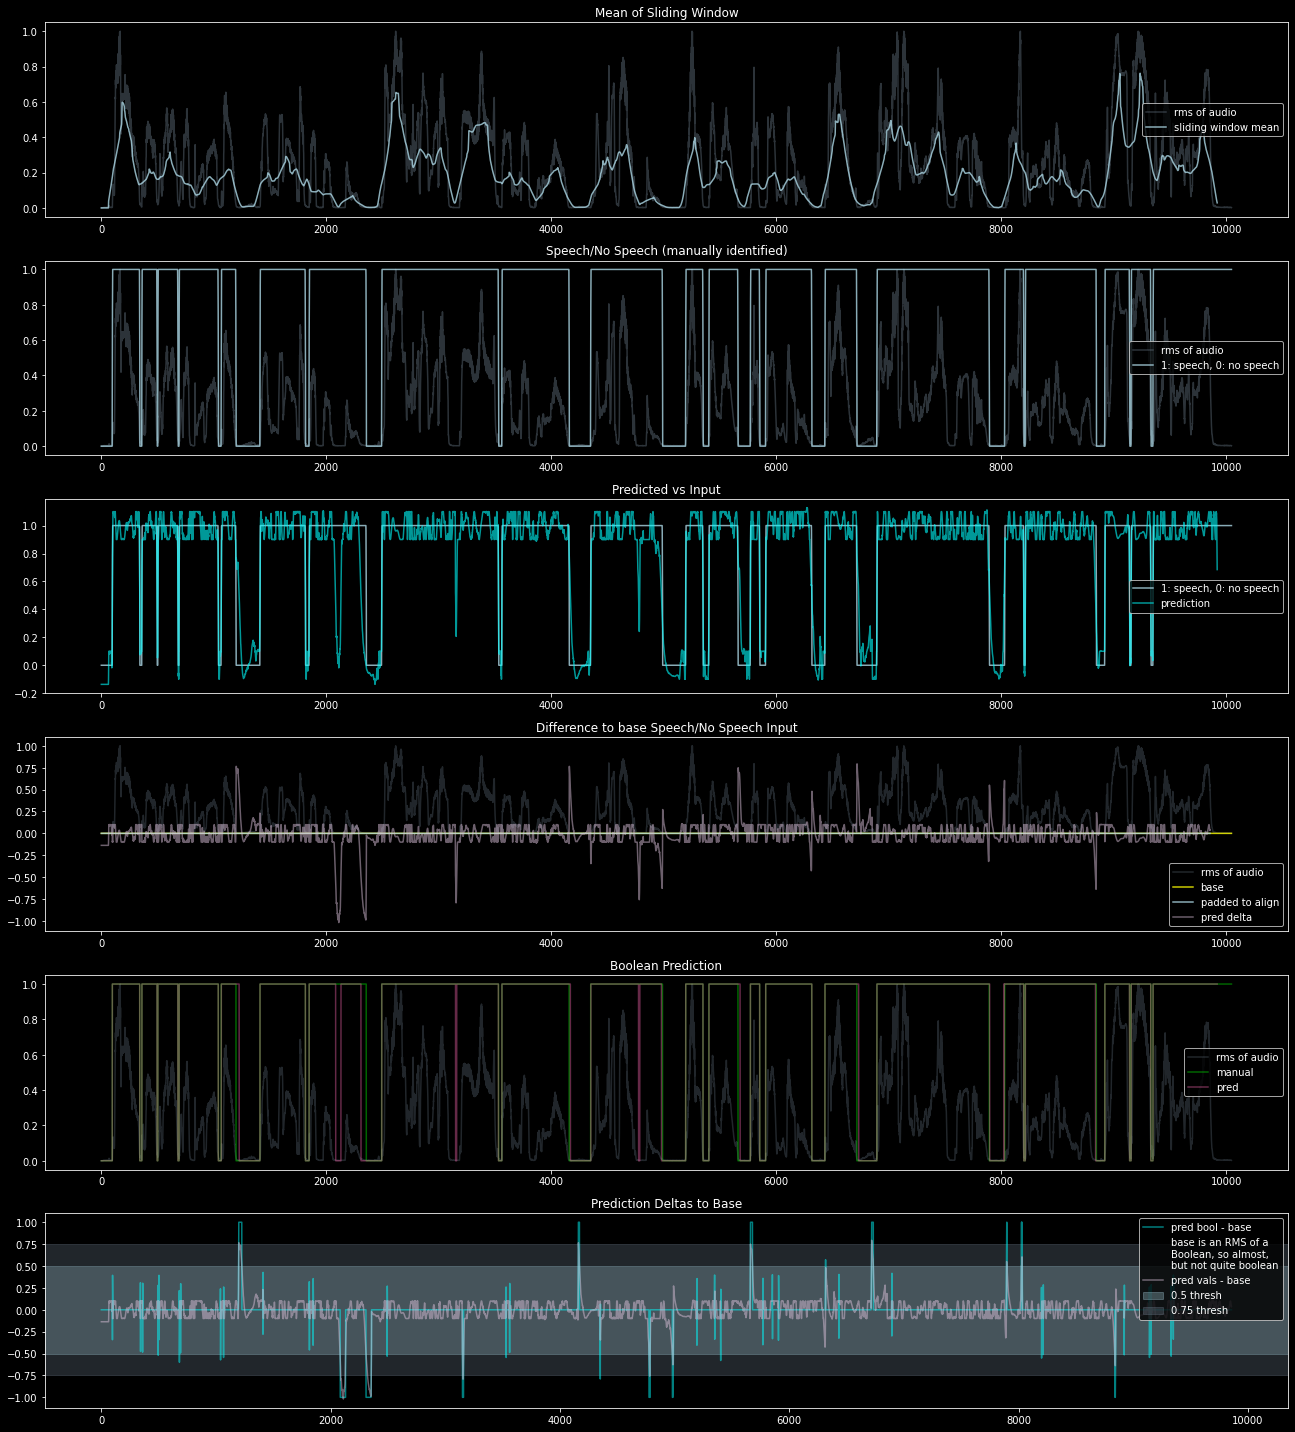

In [10]:
fig, axs  = plt.subplots(6, 1, figsize=(18,20))

axs[0].set_title(f'Mean of Sliding Window')
axs[0].plot(x_rms, color='slategray', alpha=0.4, label='rms of audio')
axs[0].plot(np.mean(align(X_train, sw_offset), axis=1), color='lightblue', alpha=0.8, label='sliding window mean')
axs[0].legend(loc='center right')

axs[1].set_title(f'Speech/No Speech (manually identified)')
axs[1].plot(x_rms, color='slategray', alpha=0.4, label='rms of audio')
axs[1].plot(y_rms, color='lightblue', alpha=0.8, label='1: speech, 0: no speech')
axs[1].legend(loc='center right')

axs[2].set_title(f'Predicted vs Input')
axs[2].plot(y_rms, color='lightblue', alpha=0.8, label='1: speech, 0: no speech')
axs[2].plot(align(y_train_pred, sw_offset), color='cyan', alpha=0.6, label='prediction')
axs[2].legend(loc='center right')

axs[3].set_title(f'Difference to base Speech/No Speech Input')
axs[3].plot(x_rms, color='slategray', alpha=0.3, label='rms of audio')
axs[3].plot(y_rms-y_rms, color='yellow', alpha=0.8, label='base')
axs[3].plot(speech_base_delta(y_train, sw_offset), color='lightblue', alpha=0.8, label="padded to align")
axs[3].plot(speech_base_delta(y_train_pred, sw_offset), color='thistle', alpha=0.5, label='pred delta')
axs[3].legend(loc='lower right')

axs[4].set_title(f'Boolean Prediction')
axs[4].plot(x_rms, color='slategray', alpha=0.3, label='rms of audio')
axs[4].plot(1*pred_threshold(y_rms, 0.5), color='lime', alpha=0.4, label='manual')
axs[4].plot(align(1*y_train_pred_bool, sw_offset), color='hotpink', alpha=0.4, label='pred')
axs[4].legend(loc='center right')

axs[5].set_title(f'Prediction Deltas to Base')
axs[5].plot(delta(1*y_train_pred_bool, y_rms, sw_offset, 0), color='cyan', alpha=0.5, label='pred bool - base')
axs[5].plot([], [], ' ', label='base is an RMS of a\nBoolean, so almost,\nbut not quite boolean')
axs[5].plot(speech_base_delta(y_train_pred, sw_offset), color='thistle', alpha=0.5, label='pred vals - base')
axs[5].axhspan(-0.5, 0.5, color='lightblue', alpha=0.3, label='0.5 thresh'),
axs[5].axhspan(-0.75, 0.75, color='slategray', alpha=0.3, label='0.75 thresh')
axs[5].legend(loc='upper right')


# axs[1].grid(alpha=0.5)
# ax2.xaxis.set_ticks(np.arange(0, len(y_svr_pts), 400))
plt.tight_layout()
plt.show()

